#              P5








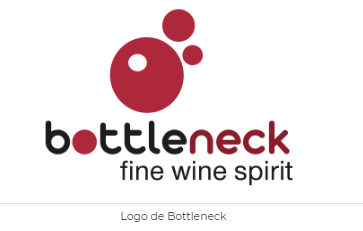




Importation des librairies
Utilisation de read_excel pour la lecture des fichiers

Observation et nettoyage du fichier 'web'
Observation et nettoyage du fichier 'erp'
Observation et nettoyage du fichier 'liaison'

Etude autour du fihcier erp \ vente maximum possible en fonction des stocks
                                             - Graphique de la répartition des ventes maximum 'possible' du stock 

Jointure des fichiers \ Fichier final erp\web

Chiffre d'affaire réalisé par produit - Rajout de la colonne 'Total' \ tableau  
                                      - Représentation graphique 
                                                 - zoom sur le CA<1000
                                                 - Fourchette des prix en fonction du CA \ Pourcentage
                                                                                                   
Chiffre d'affaire général réalisé - Résultat
                                  - Moyenne du CA
                                  - Pourcentage du CA par rapport au stock maximum

Chiffre d'affaire général réalisé par les produits en ligne seulement \ Produits issue du stock - Filtre
                                                                                                - Résultat
                                                                                                - Pourcentage                                                                                                                                           Représentation graphique de la répartion des ventes du CA


Analyse univariée sur la colonne 'Price' - Mean
                                         - Median
                                         - Mode
                                         - Quartile \ inter_quartile 
                                         - Min \ max 
                                         - Boite à moustache
                                         - Histogramme
                                         - Nuage de points
                                         - Représentation de la répartition des prix par tranche \ tableau
                                                                           - n ( nombre des prix par tranche )
                                                                           - f ( frequence ) 
                                                                           - fc (frequence cumulée)
Représentation graphique de la répartition des prix par tranche

Conclusion sur l'ensemble des résultats

## Importation des librairies

In [8]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

## Utilisation de read_excel pour la lecture des fichiers

In [11]:
erp=pd.read_excel(r"C:\Users\Rénato CATALFAMO\Desktop\erp.xlsx")

C:\anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [12]:
web=pd.read_excel(r"C:\Users\Rénato CATALFAMO\Desktop\web.xlsx")

In [13]:
liaison=pd.read_excel(r"C:\Users\Rénato CATALFAMO\Desktop\liaison.xlsx")







## Observation et nettoyage du fichier web

La clée d'unicité sur le fichier web est la colonne 'sku' renommé par 'id_web'




In [14]:
# renommage de la colonne sku ( indication dans l'explication de Sylvie)

web.rename(columns={'sku': 'id_web'}, inplace=True) 


In [15]:
# supression des potentiels doublons sur la colonne id_web

web=web.drop_duplicates(subset=['id_web'], keep='first')


In [23]:
# Observation du fichier

web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [63]:
# Observation en vue de la seléction des colonnes qui nous interesse

web.columns

Index(['id_web', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [64]:
# Observation du contenu des colonnes, ( observation au passage des colonnes completement vide)

web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 714 non-null    object        
 1   virtual                715 non-null    int64         
 2   downloadable           715 non-null    int64         
 3   rating_count           715 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post_

In [439]:
# selection des colonnes intéressante

web=web[['id_web','total_sales','post_title','post_name','post_excerpt','guid']]

In [440]:
web.head()

,id_web,total_sales,post_title,post_name,post_excerpt,guid
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,bon-cadeau-de-25-euros,"<span style=""color: #a85253;""><strong>Parlons ...",https://www.bottle-neck.fr/?post_type=product&...
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,"Il exhale un nez subtil, racé avec du poivre f...",https://www.bottle-neck.fr/?post_type=product&...
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,Les vieilles vignes lui apportent une rare pro...,https://www.bottle-neck.fr/?post_type=product&...
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,"Dentelle de fruit de jeunes syrah, aux tanins ...",https://www.bottle-neck.fr/?post_type=product&...
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,Gamine représente tout le fruité et la gourman...,https://www.bottle-neck.fr/?post_type=product&...


In [67]:
web.tail()

,id_web,total_sales,post_title,post_name,post_excerpt,guid
762,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,Belle robe jeune à dominante rubis soutenue. N...,https://www.bottle-neck.fr/?post_type=product&...
767,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,L'exotisme du nez est complété par d'élégantes...,https://www.bottle-neck.fr/?post_type=product&...
768,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",https://www.bottle-neck.fr/?post_type=product&...
797,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,"Nez gracieux, très élégant avec une touche flo...",https://www.bottle-neck.fr/?post_type=product&...
798,16230,0.0,Domaine Saint-Nicolas Vin de France Blanc Les ...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,Issu d'un assemblage de chenin blanc et de cha...,https://www.bottle-neck.fr/?post_type=product&...


## Observation et nettoyage du fichier liaison

La clée d'unicité du fichier liaison est la colonne 'id_web' par rapport au fichier web

In [441]:
# Observation

liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [16]:
# Supression des NaN de la colonne id_web

liaison=liaison.dropna(subset = ['id_web'])


In [17]:
# Supression des doublons potentiels sur la colonne product_id

liaison=liaison.drop_duplicates(subset=['product_id'], keep='first')


In [444]:
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


## Observation et nettoyage du fichier erp

La clée d'unicité du fichier erp est la colonne 'product_id' 

In [19]:
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [18]:
# Supression des potentiels doublons 

erp=erp.drop_duplicates(subset=['product_id'], keep='first')










## Petite étude autour du fichier erp \ vente maximum en fonction des stocks 

In [447]:


# création de la colonne ( vente maxi possible de tous les produits en stock en ligne ou non ) 

erp['Vente_possible_max']=erp['price']*erp['stock_quantity']

In [448]:
vente_max=round(erp['Vente_possible_max'].sum())

In [33]:
vente_max

429293

In [515]:
print('Les ventes maximum en fonction de la quantité des stocks est de :',vente_max,'euros' )




Les ventes maximum en fonction de la quantité des stocks est de : 429293 euros


In [450]:








# filtration \ vente des produits maximum pouvant être mis en ligne \ toujours en fonction des stocks

w=erp['onsale_web']!=0

In [451]:
# observation

erp_1=erp[w]

In [452]:
erp_1

,product_id,onsale_web,price,stock_quantity,stock_status,Vente_possible_max
0,3847,1,24.2,0,outofstock,0.0
1,3849,1,34.3,0,outofstock,0.0
2,3850,1,20.8,0,outofstock,0.0
3,4032,1,14.1,0,outofstock,0.0
4,4039,1,46.0,0,outofstock,0.0
...,...,...,...,...,...,...
787,6930,1,8.4,83,instock,697.2
792,7023,1,27.5,15,instock,412.5
793,7025,1,69.0,2,instock,138.0
822,7247,1,54.8,23,instock,1260.4


In [453]:
# vente maximum des produit pouvant être mis en ligne et en stock

a=round(erp_1['Vente_possible_max'].sum())

In [514]:
print('La vente maximum des produit qui sont en stock en qui peuvent être mis en ligne est de :', a, 'euros' )



La vente maximum des produit qui sont en stock en qui peuvent être mis en ligne est de : 387838 euros


In [454]:







# filtatrtion \  produit qui ne sont pas en ligne

c=erp['onsale_web']==0

In [455]:
erp_2=erp[c]

In [456]:
erp_2

,product_id,onsale_web,price,stock_quantity,stock_status,Vente_possible_max
19,4055,0,86.1,0,outofstock,0.0
49,4090,0,73.0,0,outofstock,0.0
50,4092,0,47.0,0,outofstock,0.0
119,4195,0,14.1,0,outofstock,0.0
131,4209,0,73.5,0,outofstock,0.0
...,...,...,...,...,...,...
818,7200,0,31.0,6,instock,186.0
819,7201,0,31.0,18,instock,558.0
820,7203,0,45.0,30,instock,1350.0
821,7204,0,45.0,9,instock,405.0


In [457]:
# Vente des produit maximum pouvant être vendu qui ne sont pas mis en ligne et en stock \ chiffre maxi en magasin 

b=round(erp_2['Vente_possible_max'].sum())


In [513]:
print(' La vente des produit maximum en stock et qui ne peuvent pas être mis en ligne est de :',b,'euros')


 La vente des produit maximum en stock et qui ne peuvent pas être mis en ligne est de : 41456 euros


# Graphique de la répartition des ventes des stocks possible au maximum






















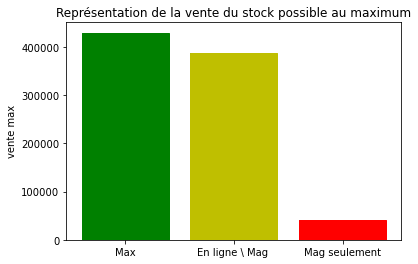

In [260]:


names = ['Max','En ligne \ Mag ', 'Mag seulement'] 
values = [vente_max,a,b]

plt.title('Représentation de la vente du stock possible au maximum')
plt.ylabel('vente max')


plt.bar(names, values)
X=plt.bar(names, values)
X[0].set_color('g')
X[1].set_color('y')
X[2].set_color('r')

plt.show()



La Représentation de la vente du stock maximum idyllique nous montre que les articles seulement en magasin ne sont pas nombreux. 

On peut voir que la majorité des produits sont aussi en ligne.

# Jointure des fichiers

In [ ]:
# Jointure des deux premièrs fichier. erp et liaison sur la colonne product_id

In [20]:
df_joint1 = pd.merge(erp, liaison, left_on="product_id", right_on="product_id")


In [460]:
df_joint1

,product_id,onsale_web,price,stock_quantity,stock_status,Vente_possible_max,id_web
0,3847,1,24.2,0,outofstock,0.0,15298
1,3849,1,34.3,0,outofstock,0.0,15296
2,3850,1,20.8,0,outofstock,0.0,15300
3,4032,1,14.1,0,outofstock,0.0,19814
4,4039,1,46.0,0,outofstock,0.0,19815
...,...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,412.5,15891
730,7025,1,69.0,2,instock,138.0,15887
731,7247,1,54.8,23,instock,1260.4,13127-1
732,7329,0,26.5,14,instock,371.0,14680-1


In [21]:
# Jointure de df_joint1 avec le fichier web sur la colonne id_web

df_joint2 = pd.merge(df_joint1, web, left_on="id_web", right_on="id_web")


# Ficher final qui regroupe les 2 fichiers erp\web

In [462]:
# Observation

df_joint2

,product_id,onsale_web,price,stock_quantity,stock_status,Vente_possible_max,id_web,total_sales,post_title,post_name,post_excerpt,guid
0,3847,1,24.2,0,outofstock,0.0,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,"Il exhale un nez subtil, racé avec du poivre f...",https://www.bottle-neck.fr/?post_type=product&...
1,3849,1,34.3,0,outofstock,0.0,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,Les vieilles vignes lui apportent une rare pro...,https://www.bottle-neck.fr/?post_type=product&...
2,3850,1,20.8,0,outofstock,0.0,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,"Dentelle de fruit de jeunes syrah, aux tanins ...",https://www.bottle-neck.fr/?post_type=product&...
3,4032,1,14.1,0,outofstock,0.0,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,Gamine représente tout le fruité et la gourman...,https://www.bottle-neck.fr/?post_type=product&...
4,4039,1,46.0,0,outofstock,0.0,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,pierre-jean-villa-cote-rotie-carmina-2017,Le côte rôtie Carmina monte en puissance mais ...,https://www.bottle-neck.fr/?post_type=product&...
...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,697.2,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,Belle robe jeune à dominante rubis soutenue. N...,https://www.bottle-neck.fr/?post_type=product&...
710,7023,1,27.5,15,instock,412.5,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,L'exotisme du nez est complété par d'élégantes...,https://www.bottle-neck.fr/?post_type=product&...
711,7025,1,69.0,2,instock,138.0,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",https://www.bottle-neck.fr/?post_type=product&...
712,7247,1,54.8,23,instock,1260.4,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,"Nez gracieux, très élégant avec une touche flo...",https://www.bottle-neck.fr/?post_type=product&...


In [22]:
# Création du fichier avec les colonnes qui nous interesse. 

base=df_joint2[['product_id', 'onsale_web','price', 'total_sales','stock_quantity', 'stock_status','id_web','post_name', 'post_excerpt','guid']]

In [464]:
base

,product_id,onsale_web,price,total_sales,stock_quantity,stock_status,id_web,post_name,post_excerpt,guid
0,3847,1,24.2,6.0,0,outofstock,15298,pierre-jean-villa-saint-joseph-preface-2018,"Il exhale un nez subtil, racé avec du poivre f...",https://www.bottle-neck.fr/?post_type=product&...
1,3849,1,34.3,0.0,0,outofstock,15296,pierre-jean-villa-saint-joseph-tilde-2017,Les vieilles vignes lui apportent une rare pro...,https://www.bottle-neck.fr/?post_type=product&...
2,3850,1,20.8,0.0,0,outofstock,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,"Dentelle de fruit de jeunes syrah, aux tanins ...",https://www.bottle-neck.fr/?post_type=product&...
3,4032,1,14.1,3.0,0,outofstock,19814,pierre-jean-villa-igp-gamine-2018,Gamine représente tout le fruité et la gourman...,https://www.bottle-neck.fr/?post_type=product&...
4,4039,1,46.0,0.0,0,outofstock,19815,pierre-jean-villa-cote-rotie-carmina-2017,Le côte rôtie Carmina monte en puissance mais ...,https://www.bottle-neck.fr/?post_type=product&...
...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,5.0,83,instock,16135,mouthes-le-bihan-aime-chai-2015,Belle robe jeune à dominante rubis soutenue. N...,https://www.bottle-neck.fr/?post_type=product&...
710,7023,1,27.5,0.0,15,instock,15891,camin-larredya-jurancon-sec-la-virada-2018,L'exotisme du nez est complété par d'élégantes...,https://www.bottle-neck.fr/?post_type=product&...
711,7025,1,69.0,0.0,2,instock,15887,jamet-cote-rotie-fructus-voluptas-2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",https://www.bottle-neck.fr/?post_type=product&...
712,7247,1,54.8,0.0,23,instock,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,"Nez gracieux, très élégant avec une touche flo...",https://www.bottle-neck.fr/?post_type=product&...


In [23]:
# supression des doublons qui pourrait exister lors de la jointure

base=base.drop_duplicates(subset=['product_id'], keep='first')


In [466]:
base

,product_id,onsale_web,price,total_sales,stock_quantity,stock_status,id_web,post_name,post_excerpt,guid
0,3847,1,24.2,6.0,0,outofstock,15298,pierre-jean-villa-saint-joseph-preface-2018,"Il exhale un nez subtil, racé avec du poivre f...",https://www.bottle-neck.fr/?post_type=product&...
1,3849,1,34.3,0.0,0,outofstock,15296,pierre-jean-villa-saint-joseph-tilde-2017,Les vieilles vignes lui apportent une rare pro...,https://www.bottle-neck.fr/?post_type=product&...
2,3850,1,20.8,0.0,0,outofstock,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,"Dentelle de fruit de jeunes syrah, aux tanins ...",https://www.bottle-neck.fr/?post_type=product&...
3,4032,1,14.1,3.0,0,outofstock,19814,pierre-jean-villa-igp-gamine-2018,Gamine représente tout le fruité et la gourman...,https://www.bottle-neck.fr/?post_type=product&...
4,4039,1,46.0,0.0,0,outofstock,19815,pierre-jean-villa-cote-rotie-carmina-2017,Le côte rôtie Carmina monte en puissance mais ...,https://www.bottle-neck.fr/?post_type=product&...
...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,5.0,83,instock,16135,mouthes-le-bihan-aime-chai-2015,Belle robe jeune à dominante rubis soutenue. N...,https://www.bottle-neck.fr/?post_type=product&...
710,7023,1,27.5,0.0,15,instock,15891,camin-larredya-jurancon-sec-la-virada-2018,L'exotisme du nez est complété par d'élégantes...,https://www.bottle-neck.fr/?post_type=product&...
711,7025,1,69.0,0.0,2,instock,15887,jamet-cote-rotie-fructus-voluptas-2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",https://www.bottle-neck.fr/?post_type=product&...
712,7247,1,54.8,0.0,23,instock,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,"Nez gracieux, très élégant avec une touche flo...",https://www.bottle-neck.fr/?post_type=product&...


## Chiffre d'affaire par produit \ colonne

In [24]:


# création de la colonne total qui reprend le prix * le nombre de vente = Chiffre d'affaire par produit. 

base['total']=base['price']*base['total_sales']

In [468]:
base

,product_id,onsale_web,price,total_sales,stock_quantity,stock_status,id_web,post_name,post_excerpt,guid,total
0,3847,1,24.2,6.0,0,outofstock,15298,pierre-jean-villa-saint-joseph-preface-2018,"Il exhale un nez subtil, racé avec du poivre f...",https://www.bottle-neck.fr/?post_type=product&...,145.2
1,3849,1,34.3,0.0,0,outofstock,15296,pierre-jean-villa-saint-joseph-tilde-2017,Les vieilles vignes lui apportent une rare pro...,https://www.bottle-neck.fr/?post_type=product&...,0.0
2,3850,1,20.8,0.0,0,outofstock,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,"Dentelle de fruit de jeunes syrah, aux tanins ...",https://www.bottle-neck.fr/?post_type=product&...,0.0
3,4032,1,14.1,3.0,0,outofstock,19814,pierre-jean-villa-igp-gamine-2018,Gamine représente tout le fruité et la gourman...,https://www.bottle-neck.fr/?post_type=product&...,42.3
4,4039,1,46.0,0.0,0,outofstock,19815,pierre-jean-villa-cote-rotie-carmina-2017,Le côte rôtie Carmina monte en puissance mais ...,https://www.bottle-neck.fr/?post_type=product&...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,5.0,83,instock,16135,mouthes-le-bihan-aime-chai-2015,Belle robe jeune à dominante rubis soutenue. N...,https://www.bottle-neck.fr/?post_type=product&...,42.0
710,7023,1,27.5,0.0,15,instock,15891,camin-larredya-jurancon-sec-la-virada-2018,L'exotisme du nez est complété par d'élégantes...,https://www.bottle-neck.fr/?post_type=product&...,0.0
711,7025,1,69.0,0.0,2,instock,15887,jamet-cote-rotie-fructus-voluptas-2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",https://www.bottle-neck.fr/?post_type=product&...,0.0
712,7247,1,54.8,0.0,23,instock,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,"Nez gracieux, très élégant avec une touche flo...",https://www.bottle-neck.fr/?post_type=product&...,0.0


In [469]:












# récupération des deux colonnes en vue de l'etude du chiffre d'affaire Total

CA=base[['product_id','total']]

In [470]:
# supression des 0

x=CA['total']!=0

In [471]:
# Application de la filtration

CA=CA[x]

In [472]:
# trie par ordre decroissant sur total

CA=CA.sort_values(by='total', ascending=False)


In [473]:
CA

,product_id,total
194,4334,4704.0
71,4144,4263.0
218,4402,2288.0
70,4142,1590.0
69,4141,1560.0
...,...,...
149,4241,8.9
152,4245,8.9
96,4171,7.8
441,5056,7.5


In [474]:
# Supression des NaN

CA_F=CA.dropna(subset = ['total'])


## Chiffre d'affaire par produit \ tableau

In [475]:

CA_F

,product_id,total
194,4334,4704.0
71,4144,4263.0
218,4402,2288.0
70,4142,1590.0
69,4141,1560.0
...,...,...
149,4241,8.9
152,4245,8.9
96,4171,7.8
441,5056,7.5


## Représentation graphique

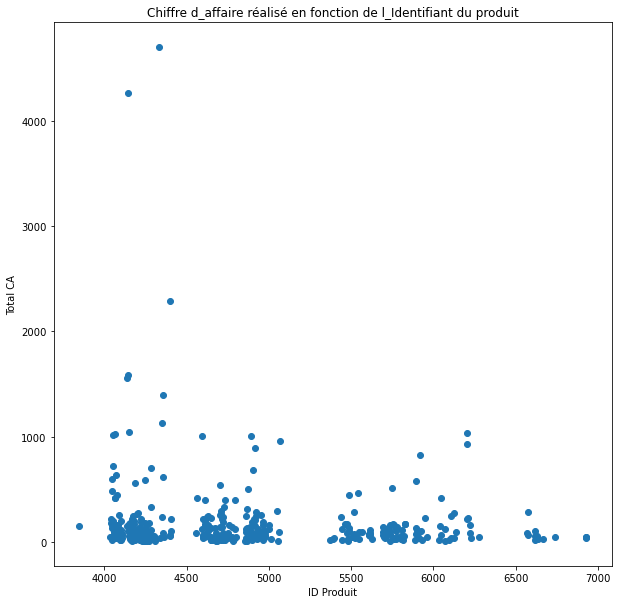

In [476]:
plt.title('Chiffre d_affaire réalisé en fonction de l_Identifiant du produit')
plt.ylabel('Total CA')
plt.xlabel('ID Produit')
x=CA_F['product_id']
y=CA_F['total']
plt.scatter(x,y)
plt.gcf().set_size_inches(10, 10)

In [477]:
# chiffre d'affaire moins de 1000 pour une meilleur lecture

R=CA_F['total']<=1000

In [478]:
CA_F2=CA_F[R]

In [479]:
CA_F2

,product_id,total
445,5067,958.4
652,6207,932.4
390,4918,892.8
605,5922,824.5
18,4054,716.0
...,...,...
149,4241,8.9
152,4245,8.9
96,4171,7.8
441,5056,7.5


# Représentation graphique <= 1000

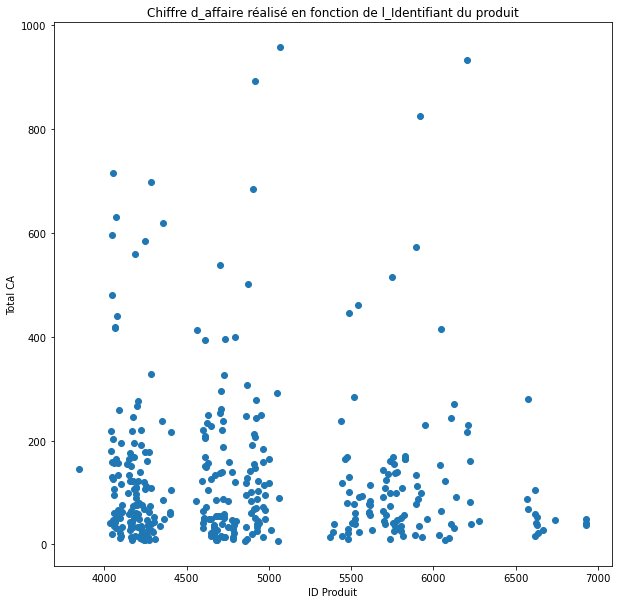

In [480]:
plt.title('Chiffre d_affaire réalisé en fonction de l_Identifiant du produit')
plt.ylabel('Total CA')
plt.xlabel('ID Produit')
x=CA_F2['product_id']
y=CA_F2['total']
plt.scatter(x,y)
plt.gcf().set_size_inches(10, 10)

On voit clairement que le chiffre d'affaire total réalisé pour chaque produit se situe entre 0-100 euros le plus frequament     puis entre 0-200 euros en majorité.




### Fourchette des prix en fonction du CA

In [568]:

fourchette=base[['price','total_sales']]
fourchette['T']=fourchette['total_sales']*fourchette['price']
fourchette


<ipython-input-568-41977fa68c98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourchette['T']=fourchette['total_sales']*fourchette['price']


,price,total_sales,T
0,24.2,6.0,145.2
1,34.3,0.0,0.0
2,20.8,0.0,0.0
3,14.1,3.0,42.3
4,46.0,0.0,0.0
...,...,...,...
709,8.4,5.0,42.0
710,27.5,0.0,0.0
711,69.0,0.0,0.0
712,54.8,0.0,0.0


In [569]:

fit1=fourchette['price']<=50
filt1=fourchette[fit1]
filt1['total_sales'].count()

586

In [575]:
# Pourcentage des ventes des produits <=50 euros


round((filt1['T'].sum())*100/CA_T,2)

78.38

Il y a 586 produits entre 0-50 euros inclue qui représente 78% du CA. Cette seul tranche nous fait comprendre la tendance du site pour la vente des produits de cet ordre qui est clairement la tendance générale. 


### Chiffre d'affaire général réalisé 

In [481]:

CA_T=round(base['total'].sum())

In [510]:
print('Le chiffre d_affaire généré par la vente de tous les produit est de :', CA_T,'euros')

Le chiffre d_affaire généré par la vente de tous les produit est de : 70569 euros


### Moyenne du CA général

In [483]:
MG=round(base['total'].mean(),2)

In [509]:
print('La moyenne du chiffre d_affaire réalisé pour chaque produit est de :',MG,'euros' )

La moyenne du chiffre d_affaire réalisé pour chaque produit est de : 98.84 euros


### Pourcentage par rapport au stock












In [485]:
m=round(CA_T*100/vente_max,2)



In [486]:
print('Le chiffre d_affaire réalisé est de',m,'% par rapport au stock que pourrait généré sa vente maximum')

Le chiffre d_affaire réalisé est de 16.44 % par rapport au stock que pourrait généré sa vente maximum


## Etude du chiffre d'affaire réalisé avec les produits en ligne seulement

In [48]:
base

,product_id,onsale_web,price,total_sales,stock_quantity,stock_status,id_web,post_name,post_excerpt,guid,total
0,3847,1,24.2,6.0,0,outofstock,15298,pierre-jean-villa-saint-joseph-preface-2018,"Il exhale un nez subtil, racé avec du poivre f...",https://www.bottle-neck.fr/?post_type=product&...,145.2
1,3849,1,34.3,0.0,0,outofstock,15296,pierre-jean-villa-saint-joseph-tilde-2017,Les vieilles vignes lui apportent une rare pro...,https://www.bottle-neck.fr/?post_type=product&...,0.0
2,3850,1,20.8,0.0,0,outofstock,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,"Dentelle de fruit de jeunes syrah, aux tanins ...",https://www.bottle-neck.fr/?post_type=product&...,0.0
3,4032,1,14.1,3.0,0,outofstock,19814,pierre-jean-villa-igp-gamine-2018,Gamine représente tout le fruité et la gourman...,https://www.bottle-neck.fr/?post_type=product&...,42.3
4,4039,1,46.0,0.0,0,outofstock,19815,pierre-jean-villa-cote-rotie-carmina-2017,Le côte rôtie Carmina monte en puissance mais ...,https://www.bottle-neck.fr/?post_type=product&...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
708,6930,1,8.4,5.0,83,instock,16135,mouthes-le-bihan-aime-chai-2015,Belle robe jeune à dominante rubis soutenue. N...,https://www.bottle-neck.fr/?post_type=product&...,42.0
709,7023,1,27.5,0.0,15,instock,15891,camin-larredya-jurancon-sec-la-virada-2018,L'exotisme du nez est complété par d'élégantes...,https://www.bottle-neck.fr/?post_type=product&...,0.0
710,7025,1,69.0,0.0,2,instock,15887,jamet-cote-rotie-fructus-voluptas-2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",https://www.bottle-neck.fr/?post_type=product&...,0.0
711,7247,1,54.8,0.0,23,instock,13127-1,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,"Nez gracieux, très élégant avec une touche flo...",https://www.bottle-neck.fr/?post_type=product&...,0.0


In [487]:
# filtre indiquant que le produit n'est pas en stock.

filtre_out=base['stock_status']=='outofstock'

In [71]:
filtre_out

0       True
1       True
2       True
3       True
4       True
       ...  
708    False
709    False
710    False
711    False
712    False
Name: stock_status, Length: 713, dtype: bool

In [488]:
filtre_out=base[filtre_out]

In [73]:
filtre_out

,product_id,onsale_web,price,total_sales,stock_quantity,stock_status,id_web,post_name,post_excerpt,guid,total
0,3847,1,24.2,6.0,0,outofstock,15298,pierre-jean-villa-saint-joseph-preface-2018,"Il exhale un nez subtil, racé avec du poivre f...",https://www.bottle-neck.fr/?post_type=product&...,145.2
1,3849,1,34.3,0.0,0,outofstock,15296,pierre-jean-villa-saint-joseph-tilde-2017,Les vieilles vignes lui apportent une rare pro...,https://www.bottle-neck.fr/?post_type=product&...,0.0
2,3850,1,20.8,0.0,0,outofstock,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,"Dentelle de fruit de jeunes syrah, aux tanins ...",https://www.bottle-neck.fr/?post_type=product&...,0.0
3,4032,1,14.1,3.0,0,outofstock,19814,pierre-jean-villa-igp-gamine-2018,Gamine représente tout le fruité et la gourman...,https://www.bottle-neck.fr/?post_type=product&...,42.3
4,4039,1,46.0,0.0,0,outofstock,19815,pierre-jean-villa-cote-rotie-carmina-2017,Le côte rôtie Carmina monte en puissance mais ...,https://www.bottle-neck.fr/?post_type=product&...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
673,6570,1,29.2,0.0,0,outofstock,15706,decelle-villa-marsannay-longeroies-2015,C’est le village le plus au nord de la Côte de...,https://www.bottle-neck.fr/?post_type=product&...,0.0
674,6572,1,44.0,0.0,0,outofstock,15704,decelle-villa-saint-aubin-dumay-2015,Commentaires à venir.,https://www.bottle-neck.fr/?post_type=product&...,0.0
677,6578,1,40.0,7.0,0,outofstock,15647,saumaize-michelin-pouilly-fuisse-ampelopsis-2016,"<div id=""wrapper"">\n<div id=""container-wrapper...",https://www.bottle-neck.fr/?post_type=product&...,280.0
700,6751,1,46.5,0.0,0,outofstock,16144,chateau-simone-blanc-2017,Les vins blancs sont d’une suprême élégance. D...,https://www.bottle-neck.fr/?post_type=product&...,0.0


In [489]:
# Filtre vente sur le web

j=filtre_out['onsale_web']==1


In [490]:
filtre_out[j]

,product_id,onsale_web,price,total_sales,stock_quantity,stock_status,id_web,post_name,post_excerpt,guid,total
0,3847,1,24.2,6.0,0,outofstock,15298,pierre-jean-villa-saint-joseph-preface-2018,"Il exhale un nez subtil, racé avec du poivre f...",https://www.bottle-neck.fr/?post_type=product&...,145.2
1,3849,1,34.3,0.0,0,outofstock,15296,pierre-jean-villa-saint-joseph-tilde-2017,Les vieilles vignes lui apportent une rare pro...,https://www.bottle-neck.fr/?post_type=product&...,0.0
2,3850,1,20.8,0.0,0,outofstock,15300,pierre-jean-villa-croze-hermitage-accroche-coe...,"Dentelle de fruit de jeunes syrah, aux tanins ...",https://www.bottle-neck.fr/?post_type=product&...,0.0
3,4032,1,14.1,3.0,0,outofstock,19814,pierre-jean-villa-igp-gamine-2018,Gamine représente tout le fruité et la gourman...,https://www.bottle-neck.fr/?post_type=product&...,42.3
4,4039,1,46.0,0.0,0,outofstock,19815,pierre-jean-villa-cote-rotie-carmina-2017,Le côte rôtie Carmina monte en puissance mais ...,https://www.bottle-neck.fr/?post_type=product&...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
674,6570,1,29.2,0.0,0,outofstock,15706,decelle-villa-marsannay-longeroies-2015,C’est le village le plus au nord de la Côte de...,https://www.bottle-neck.fr/?post_type=product&...,0.0
675,6572,1,44.0,0.0,0,outofstock,15704,decelle-villa-saint-aubin-dumay-2015,Commentaires à venir.,https://www.bottle-neck.fr/?post_type=product&...,0.0
678,6578,1,40.0,7.0,0,outofstock,15647,saumaize-michelin-pouilly-fuisse-ampelopsis-2016,"<div id=""wrapper"">\n<div id=""container-wrapper...",https://www.bottle-neck.fr/?post_type=product&...,280.0
701,6751,1,46.5,0.0,0,outofstock,16144,chateau-simone-blanc-2017,Les vins blancs sont d’une suprême élégance. D...,https://www.bottle-neck.fr/?post_type=product&...,0.0


## Prdouit vendu issue du web et comparaison avec le chiffre d'affaire général

In [491]:
v2=round(filtre_out['total'].sum())

In [492]:
v2

18614

In [508]:
print('Le nombre des produits vendu sur le web qui ne sont pas dans le stock au sein du CA est de :', v2,'euros')

Le nombre des produits vendu sur le web qui ne sont pas dans le stock au sein du CA est de : 18614 euros


In [494]:
# Réprsentation par rapport au chiffre d'affaire général

caw=round(v2*100/CA_T,2)




In [495]:
print(caw)

26.38


In [496]:
print('le chiffre d_affaire genéré que par les produits issue seulement du web est de:',caw,'%' )

le chiffre d_affaire genéré que par les produits issue seulement du web est de: 26.38 %


## Produit vendu issue du stock et comparaison avec le chiffre général

In [497]:
# Produit en stock 


filtation_int=base['stock_status']=='instock'

In [498]:
filtation_int=base[filtation_int]

In [499]:
cas=round(filtation_int['total'].sum(),2)

In [362]:
cas

51704.9

In [516]:
print('les produit vendu issue du stock sont de:',cas,'euros')

les produit vendu issue du stock sont de: 51954.9 euros


In [501]:
# Réprsentation par rapport au chiffre d'affaire général

caa=round(cas*100/CA_T,2)


In [502]:
caa

73.62

In [503]:
print('les produits vendu issue du stock sont de:',caa,'% par rapport au chiffre d_affaire général')

les produits vendu issue du stock sont de: 73.62 % par rapport au chiffre d_affaire général


## Représentation graphique 

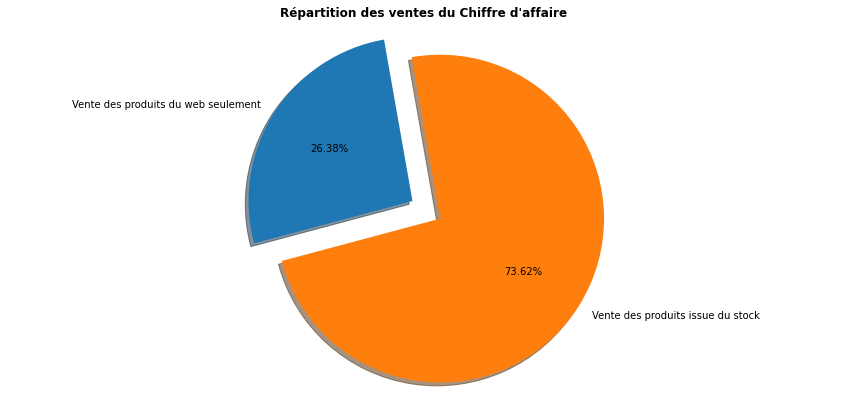

In [577]:
label = "Répartition des ventes du Chiffre d'affaire "
labels = 'Vente des produits du web seulement' , 'Vente des produits issue du stock'
x = [caw,caa]
explode = (0.2, 0) 

fig1, ax1 = plt.subplots()
ax1.pie( x, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=100)
ax1.axis('equal')  

plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")
fig1.set_size_inches(15, 7)
plt.show()

## Analyse univariée sur la colonne 'price' pour plus de précision

In [25]:
univar=base[['product_id','price']]

In [30]:
univar

,product_id,price
0,3847,24.2
1,3849,34.3
2,3850,20.8
3,4032,14.1
4,4039,46.0
...,...,...
709,6930,8.4
710,7023,27.5
711,7025,69.0
712,7247,54.8


In [506]:
# Moyenne des prix 

mean=round(univar['price'].mean(),2)
median=round(univar['price'].median(),2)

print('La moyenne des prix est de:',mean,'euros. La mediane est de:',median,'euros')

print('La médiane des prix est inferieur a la moyenne des prix. Il y a donc une asymetrie par la droite')

La moyenne des prix est de: 32.5 euros. La mediane est de: 23.5 euros
La médiane des prix est inferieur a la moyenne des prix. Il y a donc une asymetrie par la droite


In [188]:
# Mode 

univar['price'].mode()

0    19.0
dtype: float64

Le mode signifie qu'il y a le plus d'occurence autour de 19 euros.

## Quartiles

In [283]:
# quartile tous les 25%

a=univar['price'].quantile([.25,.50,.75],interpolation='nearest')


In [284]:
a

0.25    14.1
0.50    23.5
0.75    42.2
Name: price, dtype: float64

In [522]:
# calcul de l'inter-quartile

IQ=Q3-Q1

IQ=28.1


Grâce au quartile on peut aussi voir que les 3/4 des prix se situe en dessous de 42.2 euros

In [527]:
# ecart-type \ min \ max \ et au passage les quartiles

univar['price'].describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)

count    713.000000
mean      32.503647
std       27.828629
min        5.200000
25%       14.100000
50%       23.500000
75%       42.200000
max      225.000000
Name: price, dtype: float64

Une bouteille au minimum est de 5,2 euros et au maximum 225 euros. (Bien sûr '225' est surement une abération) 


 ## Boite à moutache

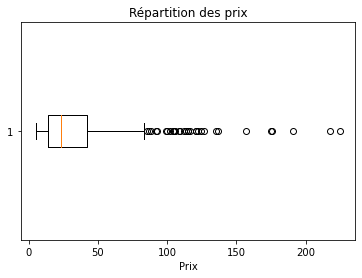

In [579]:
# boite a moustache \ étalement des prix

plt.title('Répartition des prix')
plt.xlabel('Prix')
plt.boxplot(univar['price'], vert=False)
plt.show()


In [29]:
# petit plus \ Le Skewness empirique \ mesure d'asymetrie

univar['price'].skew()

2.58090126300337

De la même façon que la boite à moustache, cette indicateur nous donne la tendance des prix qui nous montre clairement un 

étalement sur la droite car le résultat supérieur à 0 










## Histogramme des prix

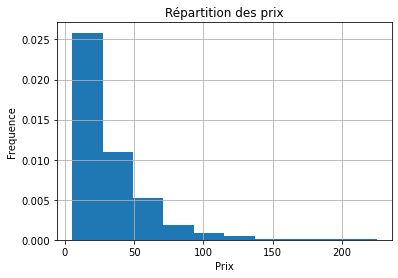

In [519]:
# densité des prix \ histogramme

plt.title('Répartition des prix')
plt.ylabel('Frequence')
plt.xlabel('Prix')
univar['price'].hist(density=True)
plt.show()

## Nuage de points des prix

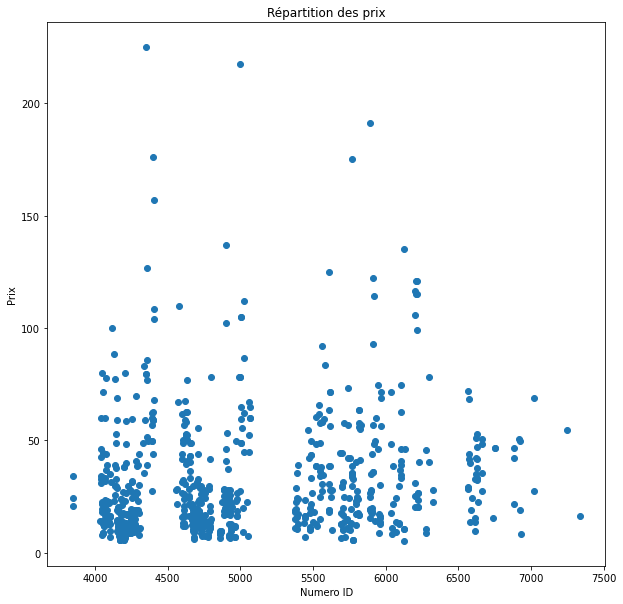

In [544]:
# Représentation des prix par nuage de point

plt.title('Répartition des prix')
plt.ylabel('Prix')
plt.xlabel('Numero ID')

x=univar['product_id']
y=univar['price']
plt.scatter(x,y)
plt.gcf().set_size_inches(10, 10)

On voit très clairement que les prix qui se situe entre 0-25 euros sont les plus élevé en nombre et nous montre une net concentration.

Un étalement est visible. Au dessus de 50 euros, les prix plus élévé diminuent fortement. 


## Création de tableau 

In [120]:
# Création du tableau \ n \ frequence \ frequence cumulée

modalites = ['0-50','50-100','100-150','150-200','200-250']

In [121]:
tab = pd.DataFrame( modalites, columns=['classe_price'])

In [122]:
tab

,classe_price
0,0-50
1,50-100
2,100-150
3,150-200
4,200-250


In [419]:
# Nombre de prix inf à 50 

inf_50=univar['price']<=50

In [422]:
a1=univar[inf_50]

In [78]:
# nombre de prix entre 50 et 100

sup_50_inf_100=(univar['price']>=50) & (univar['price']<=100)

In [423]:
a2=univar[sup_50_inf_100]

In [83]:
#  nombre de prix entre 100 et 150

sup_100_inf_150=(univar['price']>=100) & (univar['price']<=150)

In [424]:
a3=univar[sup_100_inf_150]

In [90]:
#  nombre de prix entre 150 et 200

sup_150_inf_200=(univar['price']>=150) & (univar['price']<=200)

In [425]:
a4=univar[sup_150_inf_200]

In [92]:
# nombre de prix entre 200 et 250

sup_200_inf_250=(univar['price']>=200) & (univar['price']<=250)

In [426]:
a5=univar[sup_200_inf_250]

In [427]:
for elt in [a1,a2,a3,a4,a5]:

    print("nombre", elt.count())


nombre product_id    585
price         585
dtype: int64
nombre product_id    105
price         105
dtype: int64
nombre product_id    20
price         20
dtype: int64
nombre product_id    4
price         4
dtype: int64
nombre product_id    2
price         2
dtype: int64


In [123]:
# total des nombres des prix

T=585+105+50+4+2

In [124]:
# rajouter de la colonne n 

tab['n']=[585,105,50,4,2]

In [125]:
tab

,classe_price,n
0,0-50,585
1,50-100,105
2,100-150,50
3,150-200,4
4,200-250,2


In [126]:
# rajout de la colonne f qui nous indique la frequence

tab['f']=tab['n']/T

In [127]:
tab

,classe_price,n,f
0,0-50,585,0.784182
1,50-100,105,0.140751
2,100-150,50,0.067024
3,150-200,4,0.005362
4,200-250,2,0.002681


In [130]:
# rajout de la colonne fc qui nous indique la frequence cumulé

tab['f_c']=tab['f'].cumsum()

## Représentation de la répartition des nombres des prix \ représentation par tableau

In [269]:
# Réprésentation de la répartition des prix \ représentation par tableau

tab

,classe_price,n,f,f_c
0,0-50,585,0.784182,0.784182
1,50-100,105,0.140751,0.924933
2,100-150,50,0.067024,0.991957
3,150-200,4,0.005362,0.997319
4,200-250,2,0.002681,1.000000


In [169]:
tab['n'].tolist()

[585, 105, 50, 4, 2]

## Représentation graphique en cercle

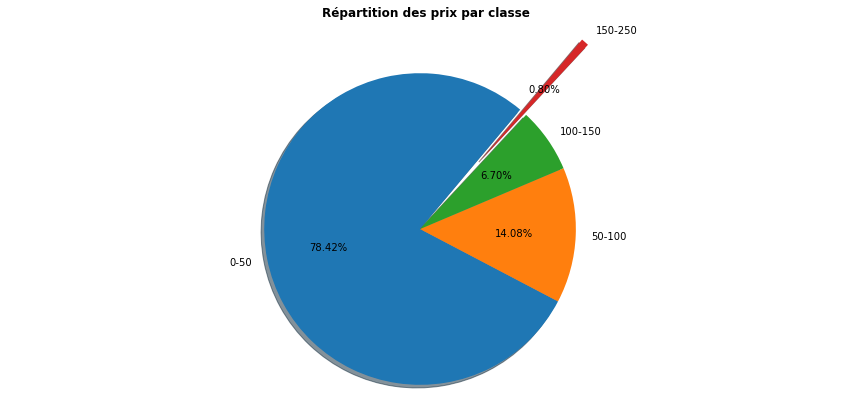

In [581]:

label = "Répartition des prix par classe"
labels = '0-50', '50-100', '100-150', '150-250',
sizes = [585,105,50,6]
explode = (0,0,0, 0.6) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=50)
ax1.axis('equal') 

plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")
fig1.set_size_inches(15, 7)
plt.show()

## Conclusion





Nous pouvont émettre l'hypothèse que les bouteilles compris entre 150 et 250 euros qui représente 0.80% sont des 

abérations par rapport au prix des bouteilles vendu sur le site qui sont en grande majorité compris entre 0-50 euros. Les 

bouteilles à titre de comparaison entre 0-50 euros représente 78% des prix. Concernant le pourcentage du CA, il représente 

aussi un ordre de 80% des ventes. Un rapprochement qui s'explique très bien vu les nombres de répartition des tranches des prix

très éloigné. 


Les bouteilles de 100-150 euros sont des bouteilles d'exeptions parmis les produits. Elle ne répreente que 6.70%. 


Concernant le trafic ( à un instant 'T' bien sûr); on peut voir que 74% des ventes sont en lien avec le stock et sont sur le 

web. Les 26% restant concerne les ventes effectuées en dehors du stock et qui sont directement en ligne. On peut donc dire que 

la partie web n'est pas négligeable. Elle est essentiel au vue des résultats concernant les ventes dans son ensemble.


Cependant une optimisation des ventes est encore largement envisageable puisque le CA correspond à 16.4% du stock maximum. Une 

stratégie non négligeable de la visibilité sur le web mais aussi en magasin est donc à optimiser pour vendre plus.



